In [118]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import kendalltau
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline

In [120]:
data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#  ***Dealing with Missing Values***

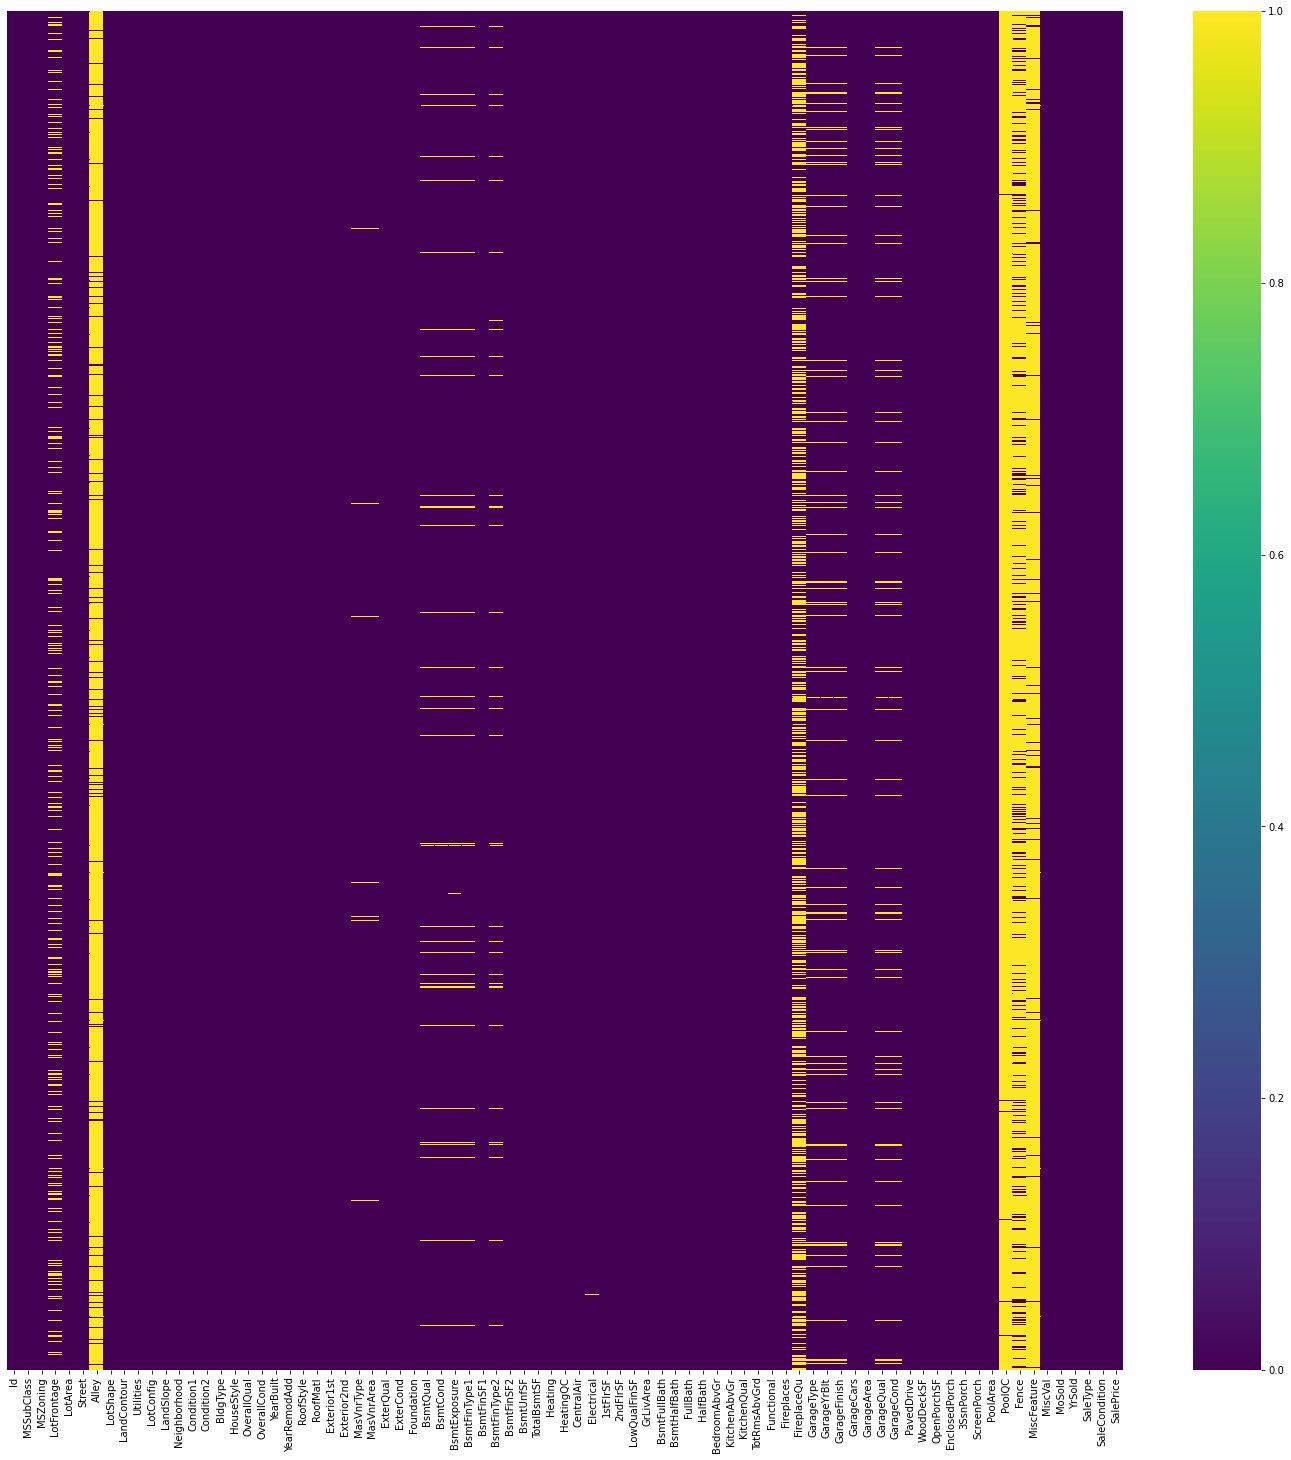

In [122]:
plt.figure(figsize=(25,25))
sns.heatmap(data.isnull(),yticklabels = False ,cmap='viridis')

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(data.isnull(),yticklabels = False ,cmap='viridis')

***The reason for lot of missing PoolQu and FireplaceQu is probably because these facilities arent there in most house, and checking the PoolArea and Fireplace features, we can see that the assumption is right, hencing converting those nan values to 0 will be the right way.....same goes for Fence.....no garage is what lead to empty values***

In [123]:
print(data['PoolQC'].unique())
print(data['FireplaceQu'].unique())
print(data['Fence'].unique())
Garage = ['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageQual',
         'GarageCond']
for col in Garage:
    print(col, " : ", data[col].unique())
print("Alley : ", data['Alley'].unique())
Basement = ['BsmtQual','BsmtCond','BsmtExposure', 'BsmtFinType1','BsmtFinType2']
for col in Basement:
    print(col, " : ", data[col].unique())


[nan 'Ex' 'Fa' 'Gd']
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
GarageType  :  ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageYrBlt  :  [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.]
GarageFinish  :  ['RFn' 'Unf' 'Fin' nan]
GarageCars  :  [2 3 1 0 4]
GarageQual  :  ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageCond  :  ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
Alley :  [nan 'Grvl' 'Pave']
BsmtQual  :  ['Gd' 'TA' 'Ex' na

In [124]:
data['PoolQC']=data['PoolQC'].replace(['Ex','Gd','Fa',np.nan],[3,2,1,0])
data['FireplaceQu']=data['FireplaceQu'].replace(['Ex','Gd','TA','Fa','Po',np.nan],[5,4,3,2,1,0])
data['Fence']=data['Fence'].replace(['GdPrv','MnPrv','GdWo','MnWw',np.nan],[4,3,2,1,0])
data['GarageType']=data['GarageType'].replace(['2Types','Attchd','Basement','BuiltIn','CarPort','Detchd',np.nan],[6,5,4,3,2,1,0])
data['GarageType']=data['GarageType'].replace('Basment',4)
data['GarageFinish']=data['GarageFinish'].replace(['Fin','RFn','Unf',np.nan],[3,2,1,0])
data['GarageQual']=data['GarageQual'].replace(['Ex','Gd','TA','Fa', 'Po', np.nan],[5,4,3,2,1,0])
data['GarageCond']=data['GarageCond'].replace(['Ex','Gd','TA','Fa', 'Po', np.nan],[5,4,3,2,1,0])
data['Alley']=data['Alley'].replace(['Pave','Grvl',np.nan],[2,1,0])
data['BsmtQual']= data['BsmtQual'].replace(['Ex','Gd','TA','Fa','Po',np.nan],[5,4,3,2,1,0])
data['BsmtCond']= data['BsmtCond'].replace(['Ex','Gd','TA','Fa','Po',np.nan],[5,4,3,2,1,0])
data['BsmtExposure']= data['BsmtExposure'].replace(['Gd','Av','Mn','No',np.nan],[4,3,2,1,0])
data['BsmtFinType1']= data['BsmtFinType1'].replace(['GLQ','ALQ','BLQ','Rec','LwQ','Unf',np.nan],[6,5,4,3,2,1,0])
data['BsmtFinType2']= data['BsmtFinType2'].replace(['GLQ','ALQ','BLQ','Rec','LwQ','Unf',np.nan],[6,5,4,3,2,1,0])
## replace not map

In [125]:
t=data.corr()
t['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
Alley           -0.092607
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtQual         0.585207
BsmtCond         0.212607
BsmtExposure     0.374696
BsmtFinType1     0.304908
BsmtFinSF1       0.386420
BsmtFinType2    -0.005323
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
FireplaceQu      0.520438
GarageType       0.415283
GarageYrBlt      0.486362
GarageFinish     0.549247
GarageCars       0.640409
GarageArea       0.623431
GarageQual       0.273839
GarageCond  

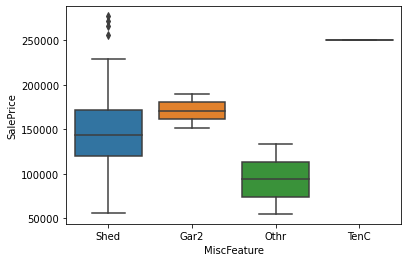

In [126]:
sns.boxplot(y='SalePrice', x='MiscFeature', data = data)
data['MiscFeature'].value_counts()
data = data.drop(['MiscFeature'], axis=1)

MiscFeatures have just 52 non null values and contribute a correlation of just -2%, hence dropping that column will be better than imputing.

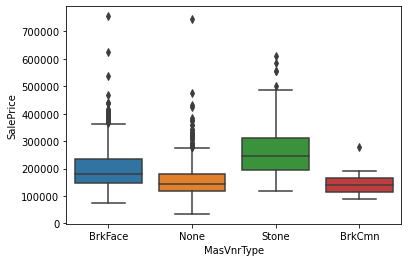

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64


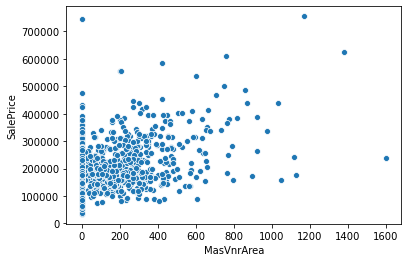

In [127]:
#understanding data of MasVnrType for missing data handling
sns.boxplot(y='SalePrice', x='MasVnrType', data = data)
plt.show()
print(data['MasVnrType'].value_counts())
sns.scatterplot(y='SalePrice', x='MasVnrArea', data =data)
print(data['MasVnrArea'].value_counts())
plt.show()
#What we see is that except for stone veneer type, the different veneer type isnt really showing a huge variation in Sale Price, and we cannot guess the veneer style for 
#None cells.
#MasVnrArea is also not showing any difference in area and HENCE TIME TO DROP BOTH
data = data.drop(['MasVnrType','MasVnrArea'], axis=1)

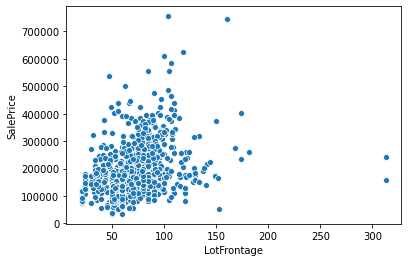

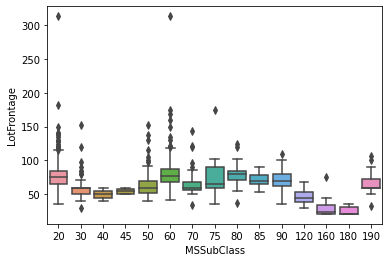

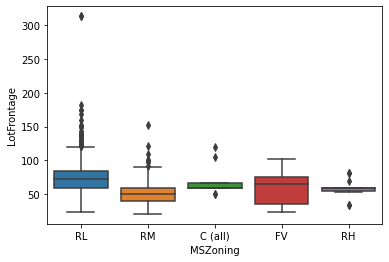

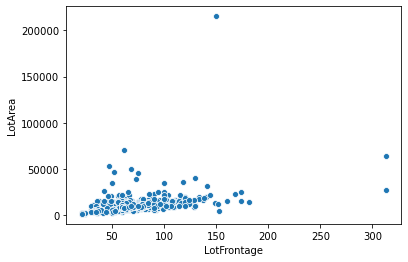

In [128]:
sns.scatterplot(y='SalePrice', x='LotFrontage', data =data)
plt.show()
sns.boxplot( y='LotFrontage', x='MSSubClass', data =data)
plt.show()
sns.boxplot( y='LotFrontage', x='MSZoning', data =data)
plt.show()
sns.scatterplot(y='LotArea', x='LotFrontage', data =data)
plt.show()
sns.boxplot( y='LotFrontage', data =data)
plt.show()

There are outlier data in LotFrontage, 
we tried to find its relation with MSSubClass, MSZoning, LotArea
and we can see from the scatter plot of LotArea and LotFrontage that there is a linear relation between both, with a corr()=42.6%

so imputation can be done using Linear Regression as LotFrontage dependent variable and LotArea independent variable 

In [129]:
L_y = data['LotFrontage']
L_X = data['LotArea']
